In [18]:
# load plotting library and src files
using PyPlot
include("./src/calcpml_2d.jl");
include("./src/yeeder.jl");
include("./src/fdfd.jl");

In [45]:
N = 100;
refs = linspace(1,5,N);
R = zeros(N,1);
for i in 1:N
    println(i)
    ref = refs[i];
    n = 1400;
    BC = [-2,-2];
    Nx2 = n;
    Ny2 = n;
    Nx = div(Nx2,2);     Ny = div(Ny2,2);
    ER2  = ones(Complex64,Nx2,Ny2);
    ER2[:,500:end] = ref;
    MUR2 = ones(Complex64,Nx2,Ny2);
    RES  = [1e-9,1e-9];
    NPML = [0 0 40 60]
    lambda0 = 100e-9;
    Pol = "Ez";
    theta = 20;
    Q = ones(Int,Nx,Ny);
    Q[:,1:Int(1*Nx/4)] = 0;
    (Ex,Ey,Ez,Hx,Hy,Hz,b) = fdfd(ER2,MUR2,RES,NPML,BC,lambda0,Pol,theta,Q);
    R[i] = abs(Hz[50,200]);
    #pcolormesh(real(Hz),cmap="RdBu")
    #colorbar()
end

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [46]:
(Ex,Ey,Ez,Hx,Hy,Hz,b) = fdfd(ER2,MUR2,RES,NPML,BC,lambda0,Pol,theta,Q);
pcolormesh(real(Hz),cmap="RdBu")
colorbar()


LoadError: LoadError: UndefVarError: ER2 not defined
while loading In[46], in expression starting on line 1

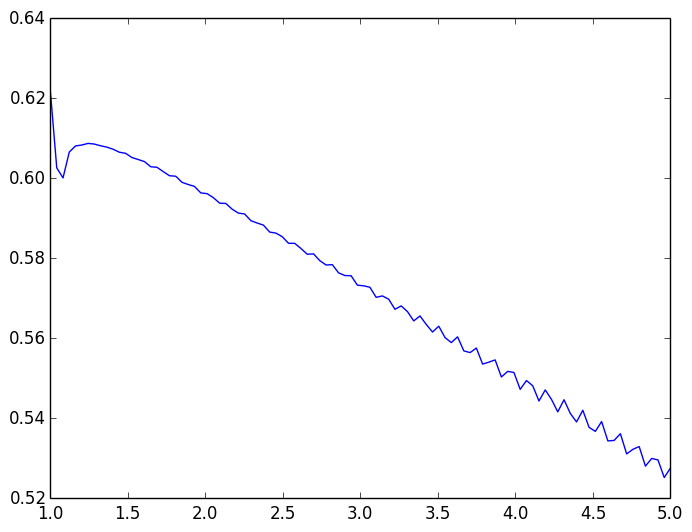

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31afe8ed0>

In [47]:
plot(refs,R)

In [ ]:
        Hz = reshape(f,Nx,Ny);
